### Importing libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os



In [47]:
data=pd.read_csv("diabetes.csv")

### Basic Statistics

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data[data['Glucose'] == 0 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


###  Data Visualization


In [9]:
px.histogram(data.Age)

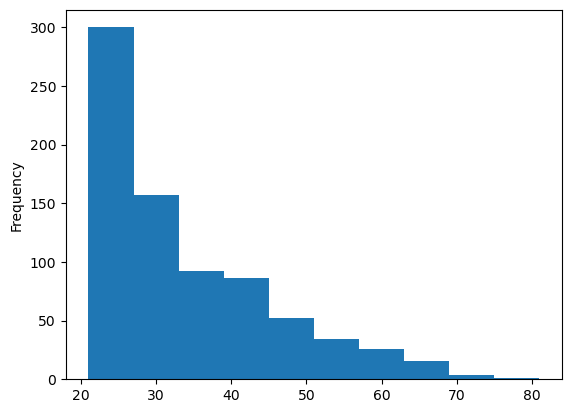

In [10]:
data.Age.plot(kind="hist")
plt.show()

In [11]:
px.bar(data.Glucose)

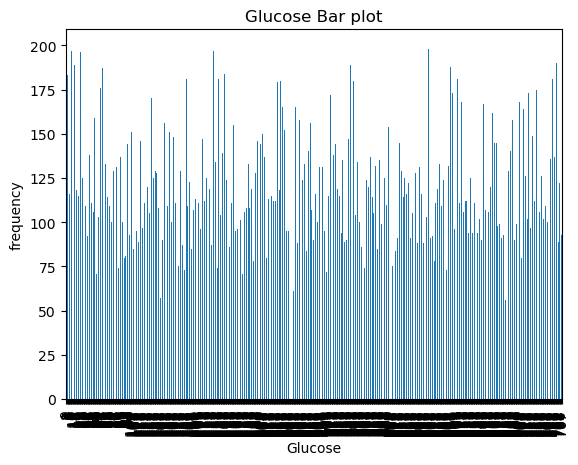

In [12]:
data.Glucose.plot(kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

In [13]:

counts = data.Glucose.value_counts().reset_index()
counts.columns=['Glucose','Count']

fig = px.bar(counts , x= 'Glucose' , y= 'Count' , title= 'Count Plot' )
fig.show()


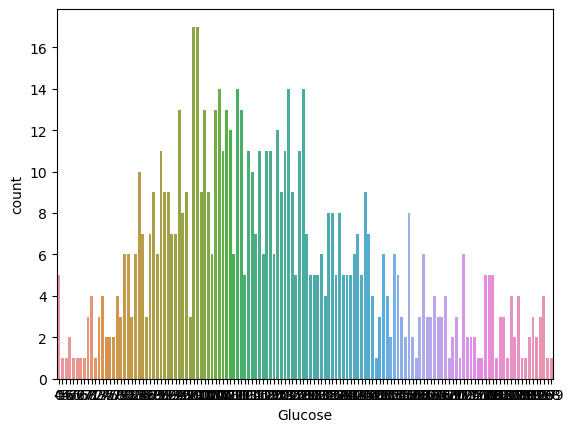

In [14]:
sns.countplot(data=data,x="Glucose")
plt.show()

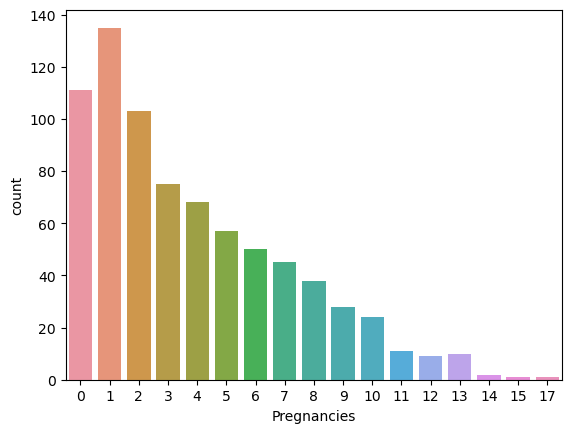

In [15]:
sns.countplot(data=data,x="Pregnancies")
plt.show()

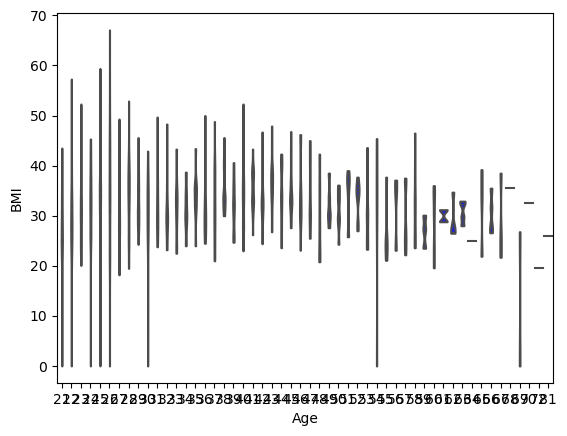

In [16]:

sns.violinplot(data=data,x="Age",y="BMI",color="blue",split=False,cut=0,bw=.3, inner="stick")
plt.show()

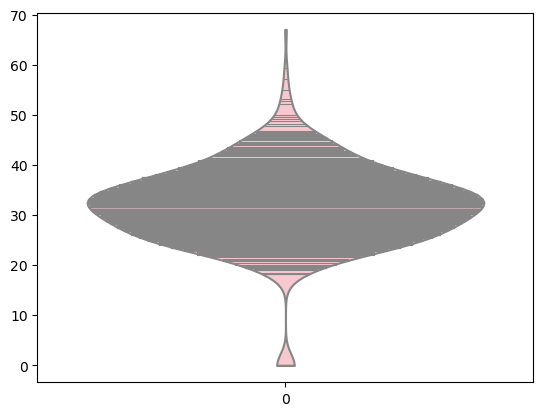

In [17]:
sns.violinplot ( data= data ["BMI"], color="pink", split=False, cut=0, bw=.3, inner="stick", scale="count")
plt.show()

In [18]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

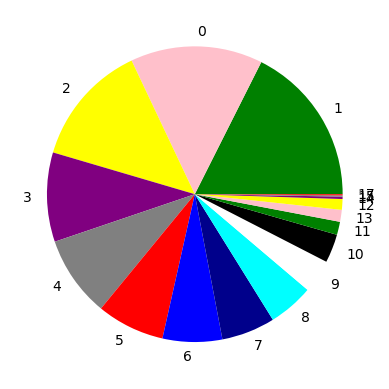

In [19]:
sizes=data.Pregnancies.value_counts().values
labels=data.Pregnancies.value_counts().index
colors=["green","pink","yellow","purple","grey","red","blue","darkblue","cyan","white","black"]
plt.pie(sizes,data=data,labels=labels,colors=colors)
plt.show()

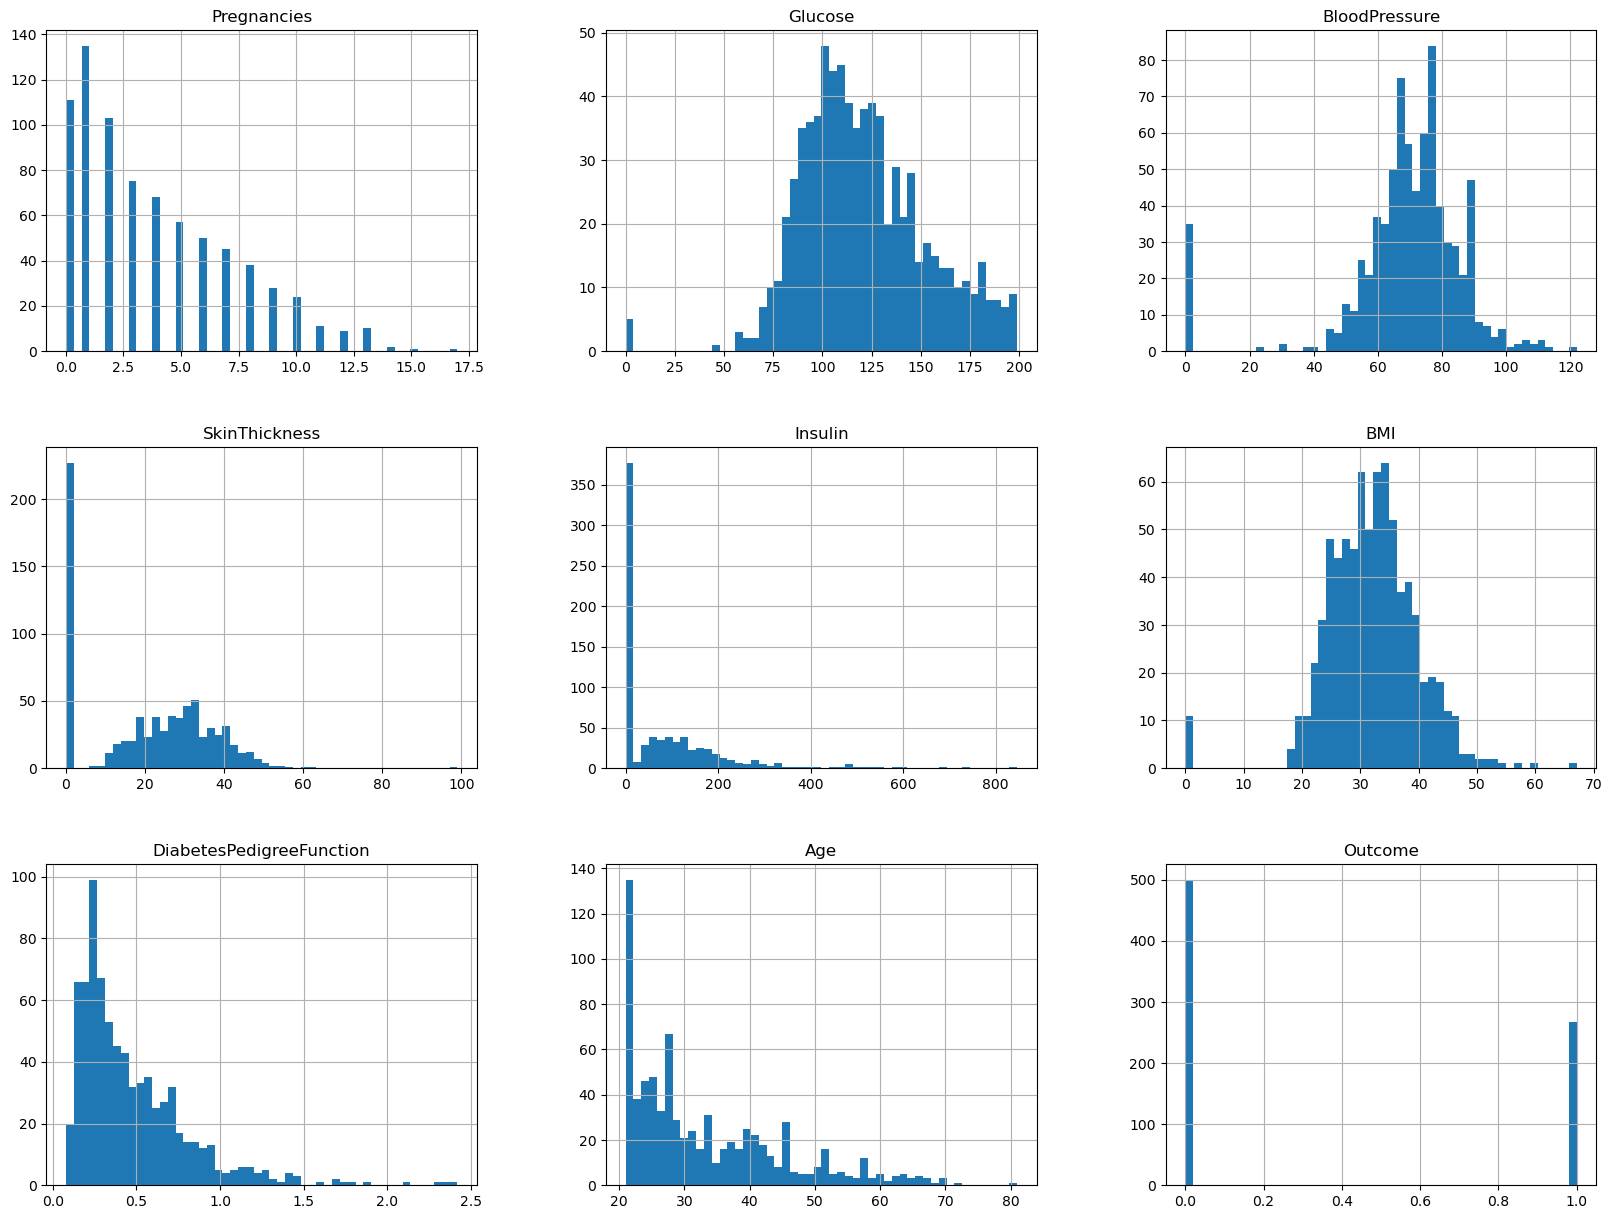

In [20]:
data.hist(bins=50, figsize=(20,15)) 
plt.show()

In [21]:
# let's look at the Corralation matrix of this data
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

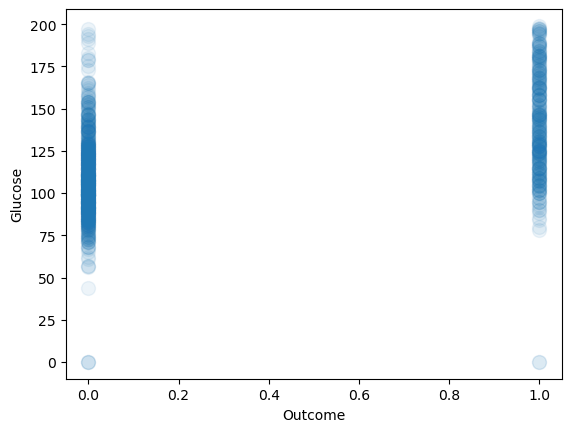

In [22]:
data.plot(kind = 'scatter', x = 'Outcome',y = 'Glucose',s = 100 ,alpha = 0.08)

plt.show()

In [50]:
data.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

* #### *there is high variance*

# Prepare the data

In [72]:
from sklearn.model_selection import train_test_split

X,y=[data.drop("Outcome",axis=1),data['Outcome']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)


In [73]:

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

train_prepared = num_pipeline.fit_transform(X_train)
test_prepared = num_pipeline.fit_transform(X_test)

## Predictions


#### Stochastic Gradient Descent (SGD)

In [83]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [85]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train,y_train, cv= 3, scoring='accuracy')

array([0.65800866, 0.35217391, 0.5       ])

In [87]:
prediction = sgd_clf.predict(X_test)
# print("SGD Accuracy of Classifier: ", sgd_clf.score(y_test,prediction))

In [89]:
print("SGD Accuracy of Classifier: ", sgd_clf.score(X_test,prediction))

SGD Accuracy of Classifier:  1.0


In [88]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,prediction))

0.35064935064935066


In [79]:
prediction.shape

(77,)

#### Logistic Regression

In [90]:

model = LogisticRegression()
model.fit(train_prepared, y_train)

LogisticRegression()

In [91]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, train_prepared, y_train, cv= 3, scoring='accuracy')

array([0.77922078, 0.77391304, 0.72173913])

In [92]:
prediction = model.predict(train_prepared)
print("LR Accuracy of Classifier: ", model.score(train_prepared, y_train))

LR Accuracy of Classifier:  0.7756874095513748


In [93]:
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()), 
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
]) 

poly_kernel_svm_clf.fit(train_prepared, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [94]:

print("SVM Accuracy of Classifier: ", poly_kernel_svm_clf.score(train_prepared, y_train))

SVM Accuracy of Classifier:  0.8451519536903039


In [95]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(poly_kernel_svm_clf, train_prepared, y_train, cv=3)

### Confusion matrix

In [102]:
from sklearn.metrics import confusion_matrix

con_mat=confusion_matrix(y_train, y_train_pred)
con_mat

array([[375,  75],
       [109, 132]], dtype=int64)

In [ ]:
sns.heatmap(con_mat ,annot=True,fmt='.2f',center=0,cmap='coolwarm')
plt.show()

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision Score:',precision_score(y_train, y_train_pred))
print('Recall Score:',recall_score(y_train, y_train_pred))
print('F1 Score:',f1_score(y_train, y_train_pred))

Precision Score: 0.6376811594202898
Recall Score: 0.5477178423236515
F1 Score: 0.5892857142857143


### ROC CURVE

In [109]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


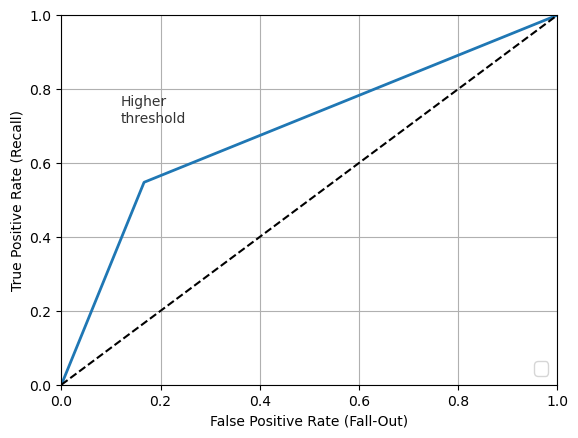

In [110]:
plt.plot(fpr, tpr, linewidth=2, label=None) 

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [111]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_pred)

0.6905255878284924

#### Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_prepared, y_train)

y_probas_forest = cross_val_predict(forest_clf, train_prepared, y_train, cv= 3, method = "predict_proba")

In [113]:

prediction = forest_clf.predict(train_prepared)
print("Random Forest Classifire Accuracy of Classifier: ", model.score(train_prepared, y_train))

Random Forest Classifire Accuracy of Classifier:  0.7756874095513748


In [114]:
cross_val_score(forest_clf, train_prepared, y_train, cv= 3, scoring='accuracy')

array([0.78787879, 0.79565217, 0.73043478])

In [115]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

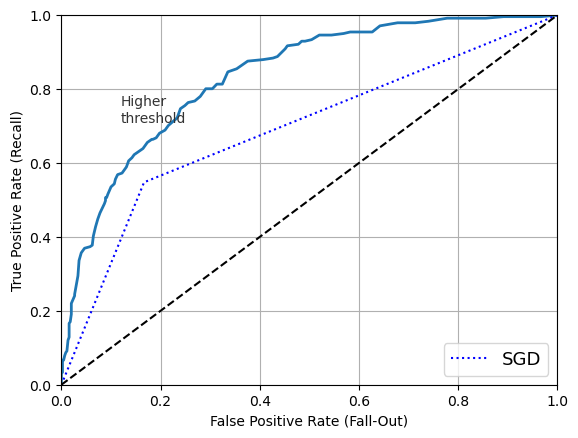

In [116]:
plt.plot(fpr_forest, tpr_forest, linewidth=2, label=None)

plt.plot(fpr, tpr, "b:", label="SGD") 
plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

In [117]:
roc_auc_score(y_train, y_train_pred)

0.6905255878284924